Dataset Preview:
   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

Missing Values:
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Summary Statistics:
       group  conversion_rate  sample_size    sum
0    control         0.120399       147202  17723
1  treatment         0.118920       147276  17514


C:\Users\mabdu\AppData\Local\Temp\ipykernel_9984\3173363552.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='group', y='converted', data=data, ci=None, palette='viridis')
C:\Users\mabdu\AppData\Local\Temp\ipykernel_9984\3173363552.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='converted', data=data, ci=None, palette='viridis')


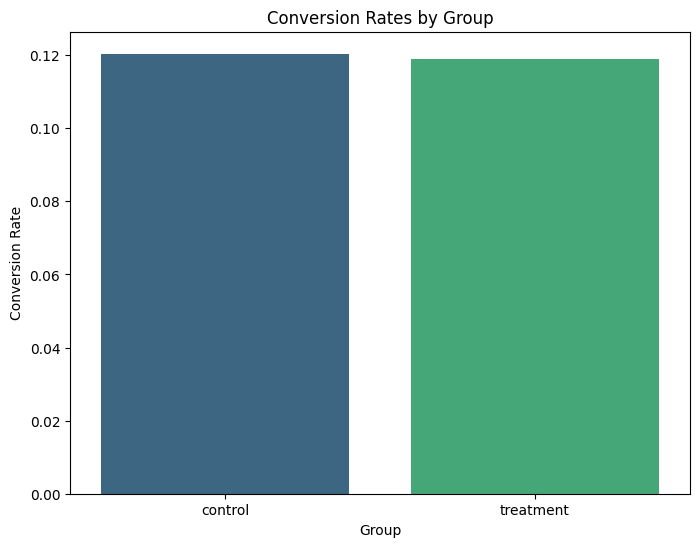


Statistical Analysis Results:
T-statistic: nan
P-value: nan

Conclusion: The difference is not statistically significant. The treatment group does not perform differently from the control group.


IndexError: index 0 is out of bounds for axis 0 with size 0

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Step 1: Load the Dataset
file_path = "C:/Users/mabdu/PycharmProjects/pythonProject/Rhombix DS/ab_data.csv"
data = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Ensure the dataset has the required columns
if 'group' not in data.columns or 'converted' not in data.columns:
    raise ValueError("The dataset must contain 'group' and 'converted' columns.")

# Step 2: Summarize Data
# Calculate conversion rates for each group
summary = data.groupby('group')['converted'].agg(['mean', 'count', 'sum']).reset_index()
summary.rename(columns={'mean': 'conversion_rate', 'count': 'sample_size'}, inplace=True)
print("\nSummary Statistics:")
print(summary)

# Step 3: Visualize Data
# Plot conversion rates
plt.figure(figsize=(8, 6))
sns.barplot(x='group', y='converted', data=data, ci=None, palette='viridis')
plt.title('Conversion Rates by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()

# Step 4: Perform Statistical Analysis
# Separate the groups
control_group = data[data['group'] == 'Control']['converted']
treatment_group = data[data['group'] == 'Treatment']['converted']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(treatment_group, control_group, equal_var=False)
print("\nStatistical Analysis Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 5: Determine Statistical Significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nConclusion: The difference is statistically significant. The treatment group performs differently from the control group.")
else:
    print("\nConclusion: The difference is not statistically significant. The treatment group does not perform differently from the control group.")

# Step 6: Optional - Practical Significance
# Calculate the absolute and relative lift
absolute_lift = summary.loc[summary['group'] == 'Treatment', 'conversion_rate'].values[0] - \
                summary.loc[summary['group'] == 'Control', 'conversion_rate'].values[0]
relative_lift = (absolute_lift / summary.loc[summary['group'] == 'Control', 'conversion_rate'].values[0]) * 100
print(f"\nAbsolute Lift: {absolute_lift:.4f}")
print(f"Relative Lift: {relative_lift:.2f}%")
